## Jupyter notebook example

This toolbox contains functions related to the processing and generation of of wave signals.

Before this notebook can be used, the required packages should be imported.

In [1]:
# import default modules
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# method to import tools
try:
    import deltares_wave_toolbox as dwt
except ImportError:
    print('**no deltares_wave_toolbox installation found in environment. Path to tools manually added')
    sys.path.insert(1, os.path.join(os.getcwd(),'..','..'))
    import deltares_wave_toolbox as dwt

**no deltares_wave_toolbox installation found in environment. Path to tools manually added


### How to use the spectrum class

The wave toolbox contains a spectrum class. This spectrum class can be created based on a frequency array and energy density array.

In this example, a triangular-shaped spectrum is constructed. 

In [2]:
fp = 0.2

f_input = [0, fp, 1]
S_input = [0, 0.1, 0]

f = np.linspace(0,1,100)
S = np.zeros_like(f)

S = np.interp(f, f_input, S_input)    

spec_block = dwt.Spectrum(f, S)



To plot the spectrum the function `plot` can be used,

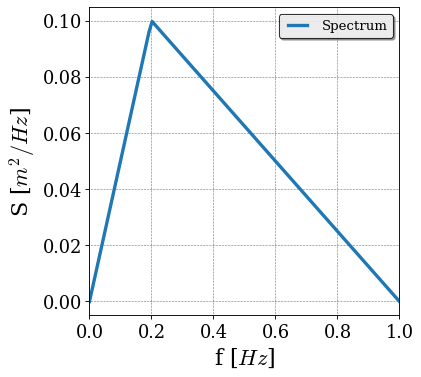

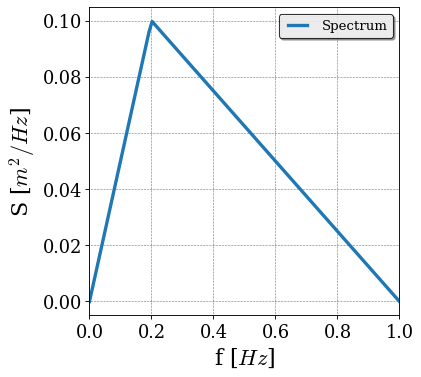

In [3]:
spec_block.plot(xlim=[0, 1])

Next to plotting, the spectral properties can be computed. After the spectral properties are computed, their values are available in the class. This means that it is also possible to show the frequencies of the various computed periods in the figure of the wave spectrum.

Wave height:0.89 m
Peak period:4.89 s
Spectral period:3.92 s


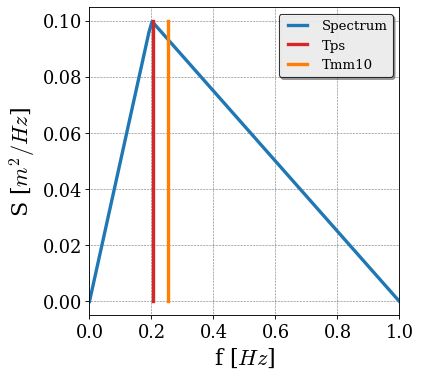

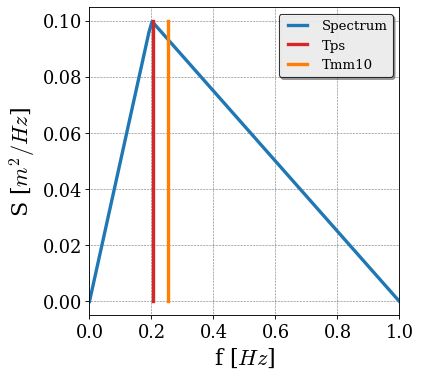

In [4]:

Hm0 = spec_block.get_Hm0()
Tps = spec_block.get_Tps()
Tmm10 = spec_block.get_Tmm10()

print('Wave height:{0:.2f} m'.format(spec_block.Hm0))
print('Peak period:{0:.2f} s'.format(spec_block.Tps))
print('Spectral period:{0:.2f} s'.format(spec_block.Tmm10))

spec_block.plot(xlim=[0, 1])

### Construct JONSWAP spectrum

Besides `Spectrum` class, it is also possible to create a JONSWAP spectrum with the `create_spectrum_jonswap` function. The input of this functions is the frequency axis, peak frequency, the wave height and peak enhancement factor.

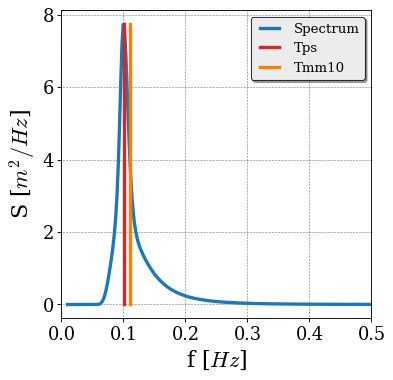

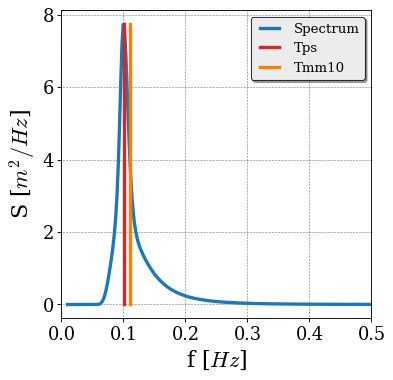

In [5]:

ff = np.linspace(0.01, 2, 1000)

spec = dwt.core_wavefunctions.create_spectrum_object_jonswap(f=ff, fp=0.1, hm0=2, gammaPeak =3.3)

Hm0 = spec.get_Hm0()
Tps = spec.get_Tps()
Tmm10 = spec.get_Tmm10()

spec.plot(xlim=[0, 0.5])

Based on the Spectrum class a time series can be generated. The Spectrum class contains a function `create_series` to create a timeseries class based on a spectrum. This function assumes that the time series can be created with random phases for the individual waves. The function `create_series` has the start and end time of the timeseries as input together  with the timestep. 

In [6]:
timeseries = spec.create_series(10, 3600, 0.1)

### Time series class

Similar to the Spectrum class the Timeseries class also contains a plot function. When the optionaly parameter plot_crossing is set to True, all the crossings with zero are shown as well.

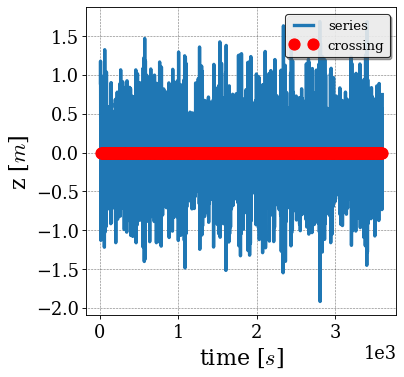

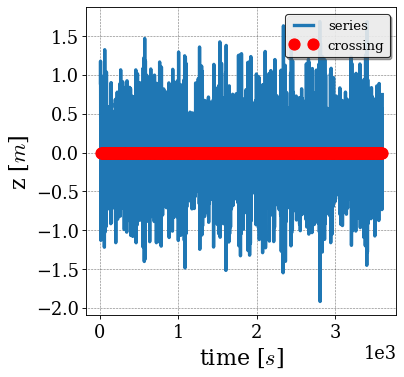

In [7]:
timeseries.plot(plot_crossing=True)

The class also contains some default signal parameters, like mean, variance, maximum and minimum:


In [8]:
print('variance:', timeseries.var())
print('max:', timeseries.max())
print('min:', timeseries.min())
print('mean:', timeseries.mean())

variance: 0.24997937940096018
max: 1.686884117523549
min: -1.9170454585062395
mean: -2.3006067784413458e-05


The time series class contains also functions related to individual waves. These parameters are based on the individual waves determined with a zero-crossing analysis.

For example, the $H_{rms}$ is available. By theory the $H_{rms}$ times the square-root of 2 is equal to the significant wave height.

In [9]:

Hrms = timeseries.get_Hrms()


print('Hm0: {0:.2f}'.format(spec.get_Hm0()))
print('Hrms x sqrt(2): {0:.2f}'.format(Hrms*np.sqrt(2)))

Hm0: 2.00
Hrms x sqrt(2): 1.95


But also information about the exceedance distribution is available, for example the exceedance wave height or the mean of the highest part of the exceedance distribution.

This means that we have the third definition of the (significant) wave height.

In [10]:
h2perc = timeseries.get_exceedance_waveheight(2)
h10perc = timeseries.get_exceedance_waveheight(10)
Hs, Ts = timeseries.highest_waves(0.33333)

print('Hm0: {0:.2f}'.format(spec.get_Hm0()))
print('Hrms x sqrt(2): {0:.2f}'.format(Hrms*np.sqrt(2)))
print('Hs: {0:.2f}'.format(Hs))

Hm0: 2.00
Hrms x sqrt(2): 1.95
Hs: 1.92


The time series class also contains a `get_spectrum` function to create a spectrum based on the time series.

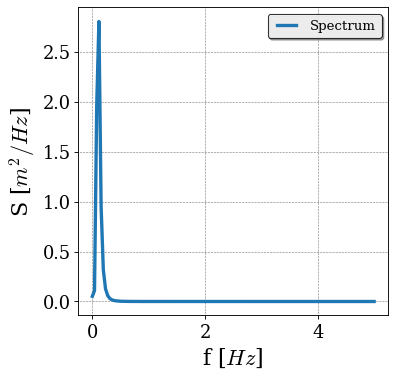

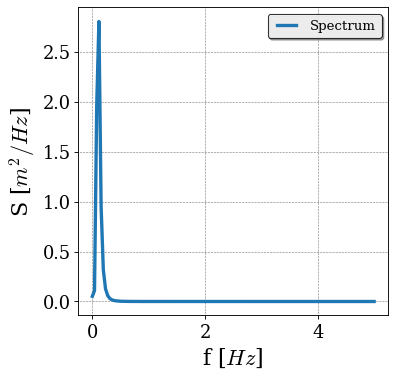

In [11]:
spec2 = timeseries.get_spectrum()
spec2.plot()

### Exceedance distributions
The exceedance distribution of the time series can be visualized in three different ways:
- Histogram
- Exceedance plot
- Exceedance plot on a Rayleigh scale (this option also has the possibility to show the Raleigh and Battjes-Groenendijk distributions). 

When plotting the Battjes-Groenendijk distribution, the wave height is required as input parameter. Since the timeseries object does not contain a wave height, the wave height  from the spectral object is used as input.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


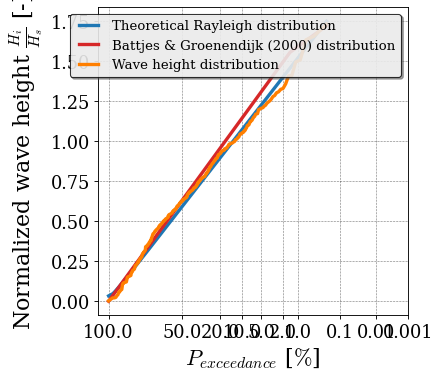

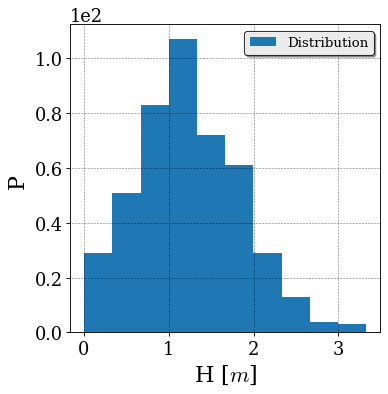

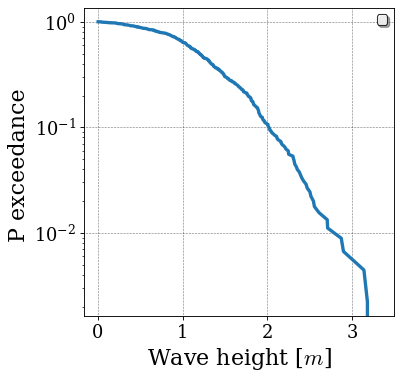

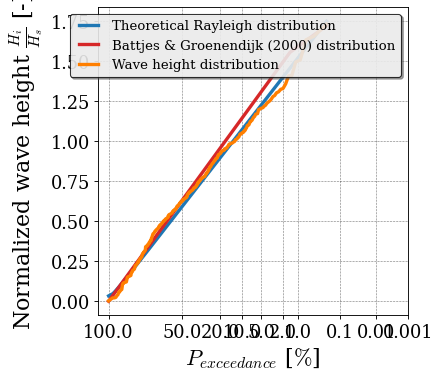

In [12]:

timeseries.plot_hist_waveheight()
timeseries.plot_exceedance_waveheight()
timeseries.plot_exceedance_waveheight_Rayleigh(
    normalize=True, plot_BG=True, water_depth=8, cota_slope=250, hm0 = spec.Hm0
)



### Fourier analysis

The timeseries can be transformed to Fourier components with the function `get_fourier_comp`.



c:\Users\ridde_mo\AppData\Local\anaconda3\envs\dwt_dev\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


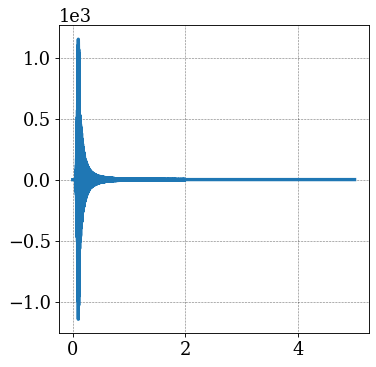

In [13]:
f, xFreq, isOdd = timeseries.get_fourier_comp()

plt.figure()
plt.plot(f, xFreq)

These Fourier components can be used to construct a spectrum with the `compute_spectrum_freq_serie` functions,

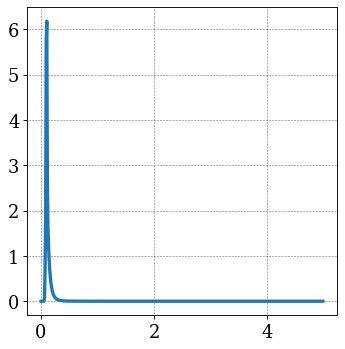

In [14]:
[f, S] = dwt.core_spectral.compute_spectrum_freq_series(f, xFreq, timeseries.nt, 0.01)

plt.figure()
plt.plot(f,S)